# Segunda entrega trabajo integrador

## Analisis exploratorio de datos

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,date,text,favorites,retweets,Toxic,Insult,Profanity,Derogatory,Sexual,"Death, Harm & Tragedy",...,Illicit Drugs,War & Conflict,Politics,Finance,Legal,btc_tweet_day,btc_24h_after,btc_48h_after,btc_delta_24h,btc_delta_48h
0,2020-03-03 01:34:00,I was thrilled to be back in the Great city of...,73748,17404,0.014622,0.010394,0.002904,0.003574,0.002435,0.059701,...,0.036585,0.472222,0.867769,0.079710,0.435185,8753.01,8700.00,9085.48,-53.01,332.47
1,2020-01-17 03:22:00,RT @CBS_Herridge: READ: Letter to surveillance...,0,7396,0.050346,0.050961,0.023985,0.008934,0.010127,0.085399,...,0.294118,0.350000,0.680934,0.081967,0.948357,8850.83,8903.26,8631.95,52.43,-218.88
2,2020-09-12 20:10:00,The Unsolicited Mail In Ballot Scam is a major...,80527,23502,0.258527,0.112138,0.058611,0.043741,0.015008,0.082609,...,0.700000,0.058824,0.937500,0.515901,0.858108,10359.99,10280.14,10698.03,-79.85,338.04
3,2020-01-17 13:13:00,RT @MZHemingway: Very friendly telling of even...,0,9081,0.018771,0.012035,0.004276,0.003942,0.002470,0.207207,...,0.057377,0.375000,0.912500,0.079710,0.333333,8850.83,8903.26,8631.95,52.43,-218.88
4,2020-01-17 00:11:00,RT @WhiteHouse: President @realDonaldTrump ann...,0,25048,0.016713,0.011194,0.004276,0.005187,0.002435,0.073482,...,0.057377,0.141892,0.969512,0.102302,0.948357,8850.83,8903.26,8631.95,52.43,-218.88


In [20]:
# Agregar features de cambio porcentual
# Calcular el cambio porcentual de 24h y 48h vs el precio del día del tweet
df['btc_delta_24h_pct'] = df['btc_delta_24h'] / df['btc_tweet_day']
df['btc_delta_48h_pct'] = df['btc_delta_48h'] / df['btc_tweet_day']

# Verificar los nuevos features
print("Nuevas columnas agregadas:")
print(f"btc_delta_24h_pct: min={df['btc_delta_24h_pct'].min():.4f}, max={df['btc_delta_24h_pct'].max():.4f}")
print(f"btc_delta_48h_pct: min={df['btc_delta_48h_pct'].min():.4f}, max={df['btc_delta_48h_pct'].max():.4f}")

df[['btc_tweet_day', 'btc_delta_24h', 'btc_delta_48h', 'btc_delta_24h_pct', 'btc_delta_48h_pct']].head()


Nuevas columnas agregadas:
btc_delta_24h_pct: min=-0.2287, max=0.2680
btc_delta_48h_pct: min=-0.3404, max=0.2413


,btc_tweet_day,btc_delta_24h,btc_delta_48h,btc_delta_24h_pct,btc_delta_48h_pct
0,8753.01,-53.01,332.47,-0.006056,0.037984
1,8850.83,52.43,-218.88,0.005924,-0.024730
2,10359.99,-79.85,338.04,-0.007708,0.032629
3,8850.83,52.43,-218.88,0.005924,-0.024730
4,8850.83,52.43,-218.88,0.005924,-0.024730


Vamos a comenzar acomodando las columnas generadas por la herramienta de analisis de Google, normlaizandolas\

Para eso se normaliza re escalando contra el maximo del valor de la columna

In [2]:
# Convertir todas las columnas a lowercase snake_case
import re

def to_snake_case(name):
    """Convierte un string a snake_case"""
    # Insertar un guión bajo antes de cualquier letra mayúscula que esté precedida por una letra minúscula
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    # Insertar un guión bajo antes de cualquier letra mayúscula que esté precedida por una letra minúscula o dígito
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    # Convertir a minúsculas y reemplazar espacios y guiones con guiones bajos
    s3 = re.sub(r'[-\s]+', '_', s2)
    # Limpiar guiones bajos múltiples
    s4 = re.sub(r'_+', '_', s3)
    # Remover guiones bajos al inicio y final
    return s4.strip('_').lower()


# Convertir a snake_case
df.columns = [to_snake_case(col) for col in df.columns]


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Google columns to rescale
columns_to_rescale = [
    'toxic', 'insult', 'profanity', 'derogatory', 'sexual', 
    'death,_harm_&_tragedy', 'violent', 'firearms_&_weapons', 
    'public_safety', 'health', 'religion_&_belief', 'illicit_drugs', 
    'war_&_conflict', 'politics', 'finance', 'legal'
]

# Filtrar solo las columnas que existen
existing_columns = [col for col in columns_to_rescale if col in df.columns]

# Aplicar MinMaxScaler directamente al DataFrame original
scaler = MinMaxScaler(feature_range=(0, 1))
df[existing_columns] = scaler.fit_transform(df[existing_columns])

df[existing_columns].head()


,toxic,insult,profanity,derogatory,sexual,"death,_harm_&_tragedy",violent,firearms_&_weapons,public_safety,health,religion_&_belief,illicit_drugs,war_&_conflict,politics,finance,legal
0,0.004080,0.004846,0.003078,0.005484,0.003537,0.059701,0.016369,0.018182,0.051813,0.023788,0.053924,0.036585,0.472222,0.867769,0.079770,0.435185
1,0.043941,0.052683,0.025424,0.013710,0.015471,0.085399,0.777035,0.105263,0.976744,0.102968,0.019229,0.294118,0.350000,0.680934,0.082029,0.948357
2,0.276231,0.124824,0.062128,0.067121,0.023045,0.082609,0.238746,0.105263,0.594771,0.102968,0.101176,0.700000,0.058824,0.937500,0.516288,0.858108
3,0.008710,0.006781,0.004532,0.006049,0.003591,0.207207,0.195894,0.018182,0.594771,0.034775,0.053924,0.057377,0.375000,0.912500,0.079770,0.333333
4,0.006414,0.005790,0.004532,0.007959,0.003537,0.073482,0.187486,0.076923,0.090909,0.096141,0.927211,0.057377,0.141892,0.969512,0.102379,0.948357


## En busca de correlaciones

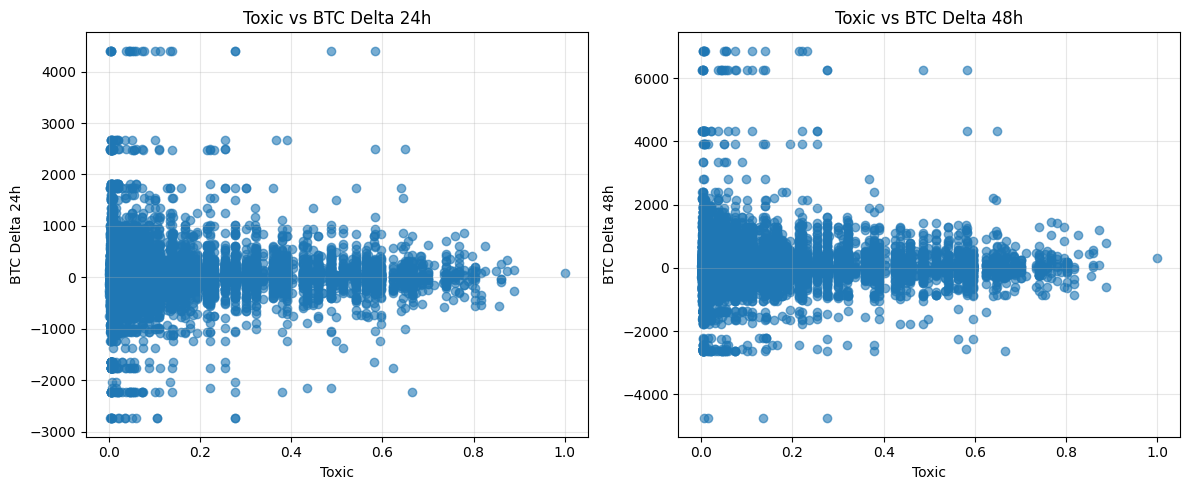

In [4]:
import matplotlib.pyplot as plt

# Scatter plot: toxic vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['toxic'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Toxic')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Toxic vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['toxic'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Toxic')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Toxic vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


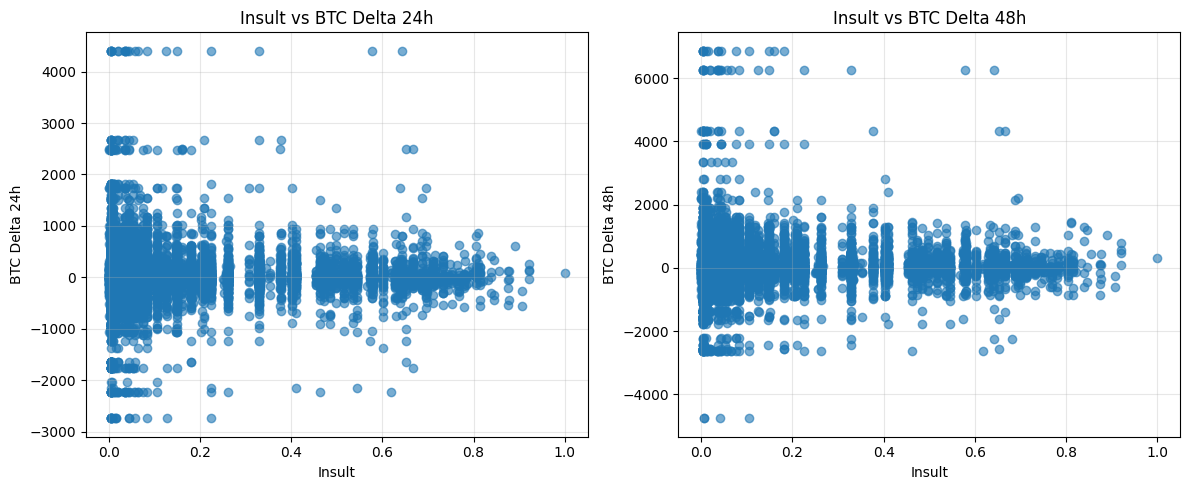

In [5]:
# Scatter plot: insult vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['insult'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Insult')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Insult vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['insult'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Insult')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Insult vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


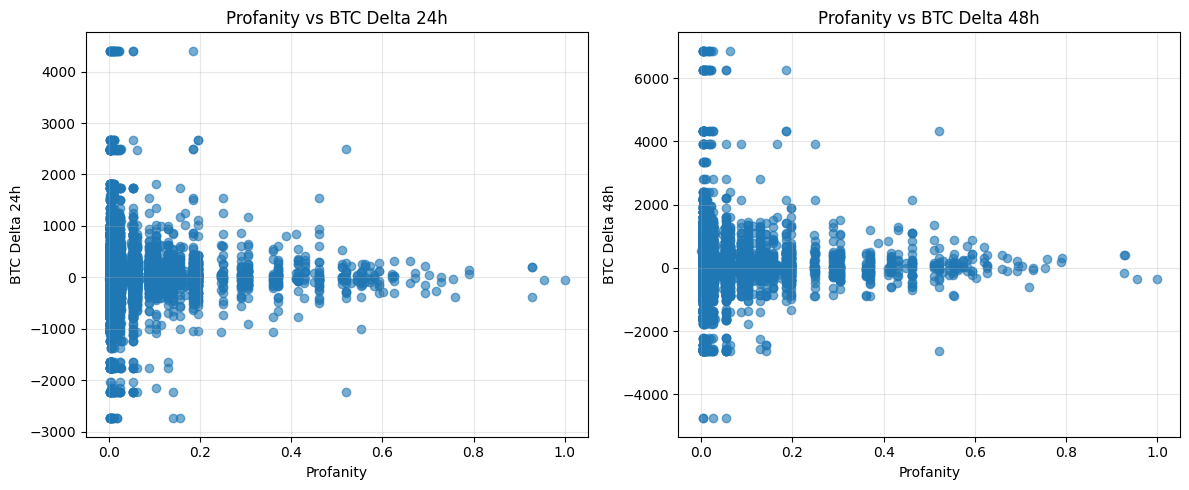

In [6]:
# Scatter plot: profanity vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['profanity'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Profanity')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Profanity vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['profanity'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Profanity')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Profanity vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


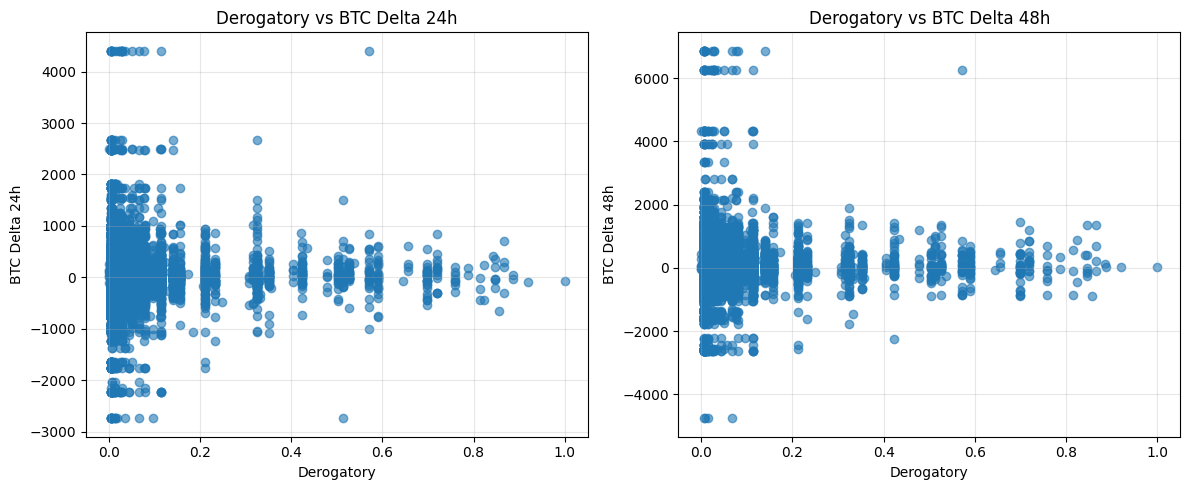

In [7]:
# Scatter plot: derogatory vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['derogatory'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Derogatory')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Derogatory vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['derogatory'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Derogatory')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Derogatory vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


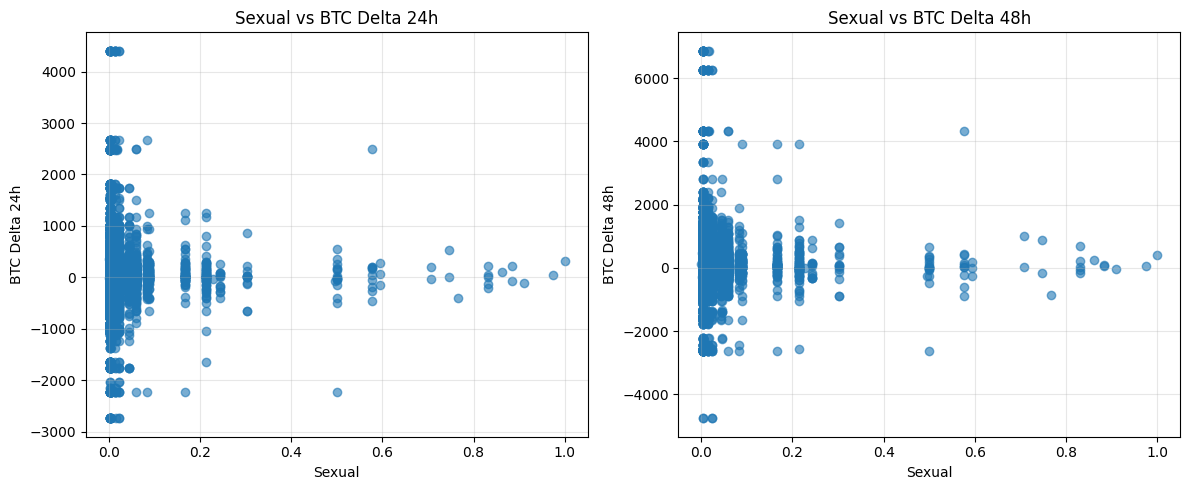

In [8]:
# Scatter plot: sexual vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['sexual'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Sexual')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Sexual vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['sexual'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Sexual')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Sexual vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


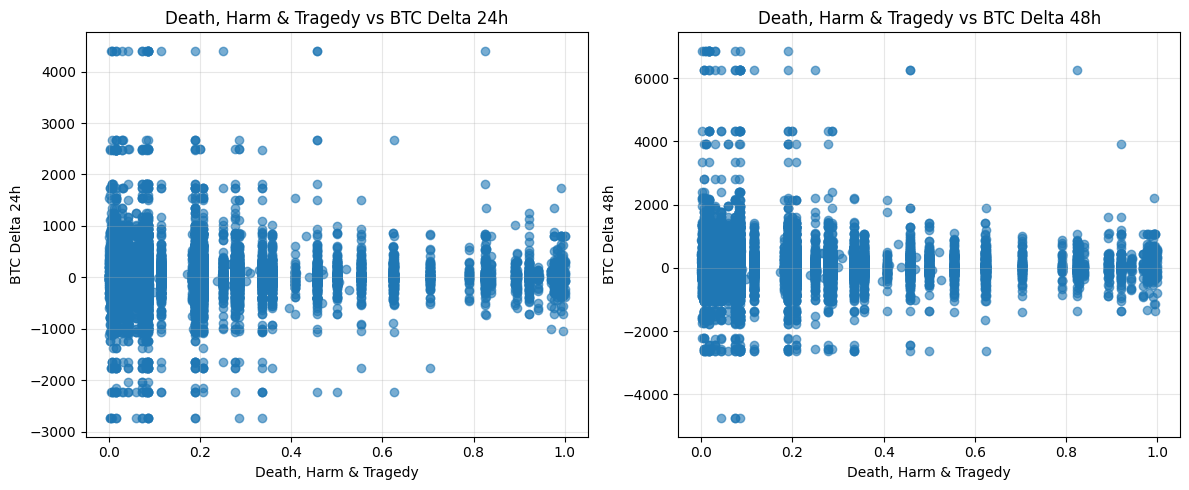

In [9]:
# Scatter plot: death,_harm_&_tragedy vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['death,_harm_&_tragedy'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Death, Harm & Tragedy')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Death, Harm & Tragedy vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['death,_harm_&_tragedy'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Death, Harm & Tragedy')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Death, Harm & Tragedy vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


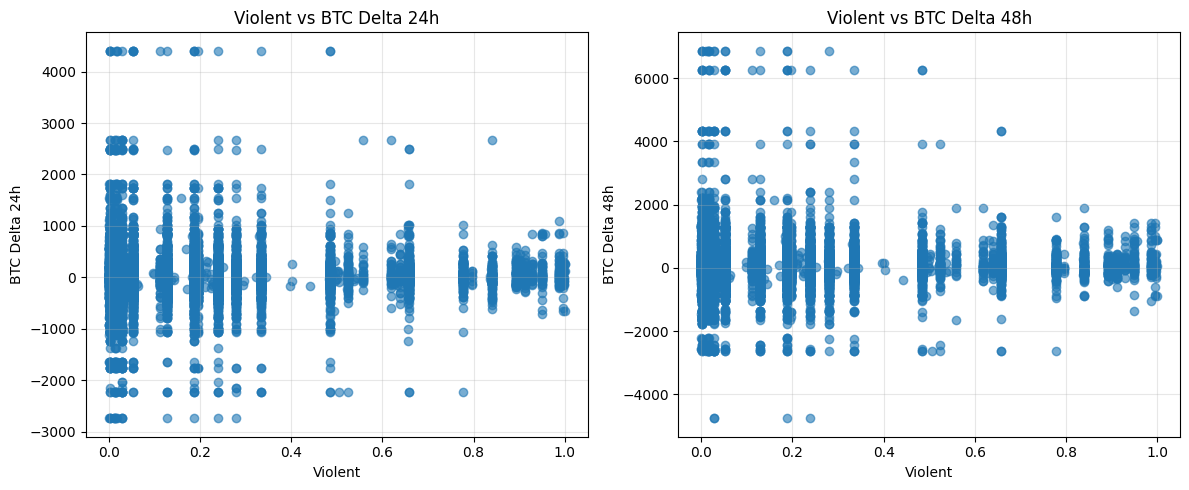

In [10]:
# Scatter plot: violent vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['violent'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Violent')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Violent vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['violent'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Violent')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Violent vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


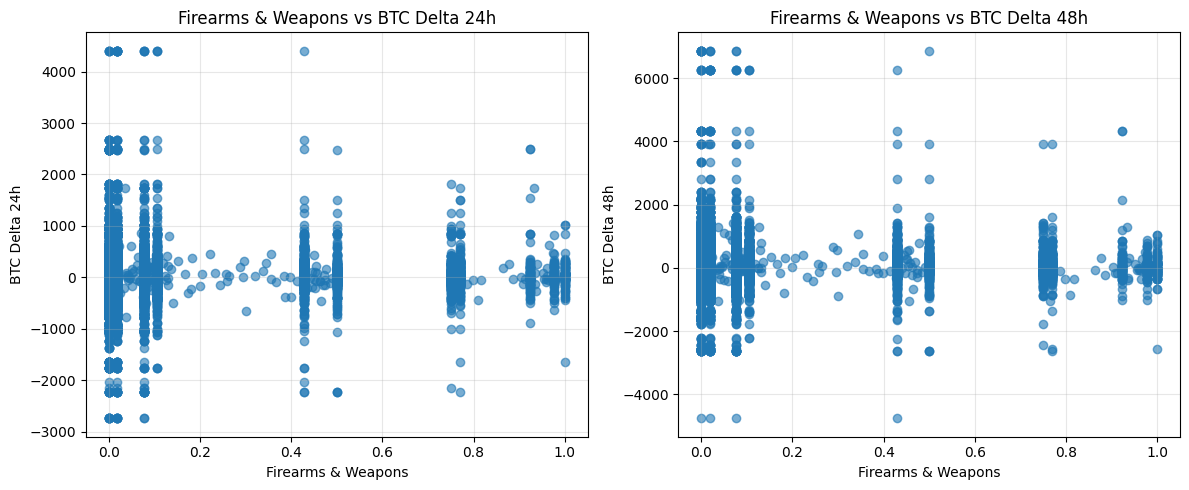

In [11]:
# Scatter plot: firearms_&_weapons vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['firearms_&_weapons'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Firearms & Weapons')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Firearms & Weapons vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['firearms_&_weapons'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Firearms & Weapons')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Firearms & Weapons vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


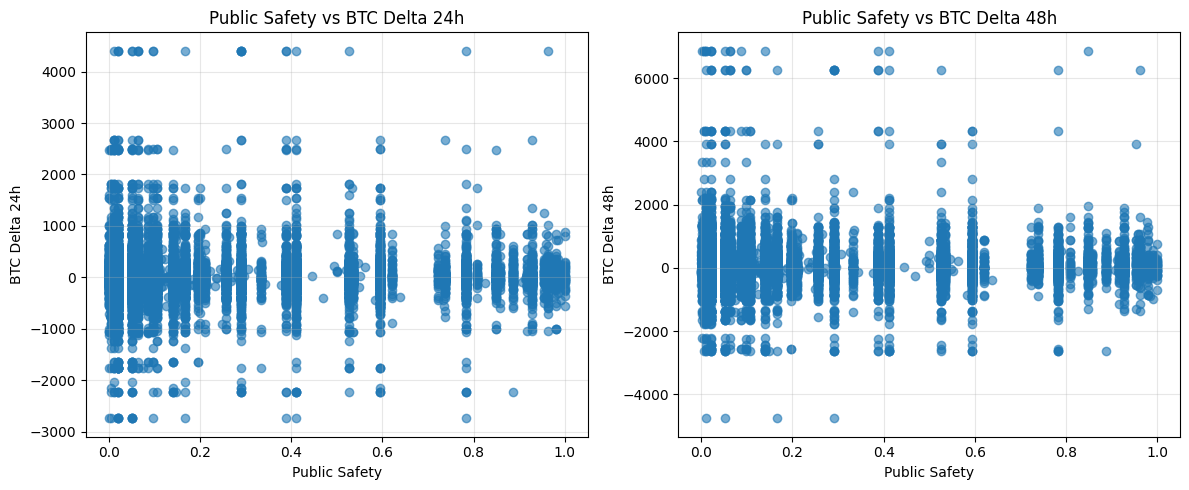

In [12]:
# Scatter plot: public_safety vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['public_safety'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Public Safety')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Public Safety vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['public_safety'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Public Safety')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Public Safety vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


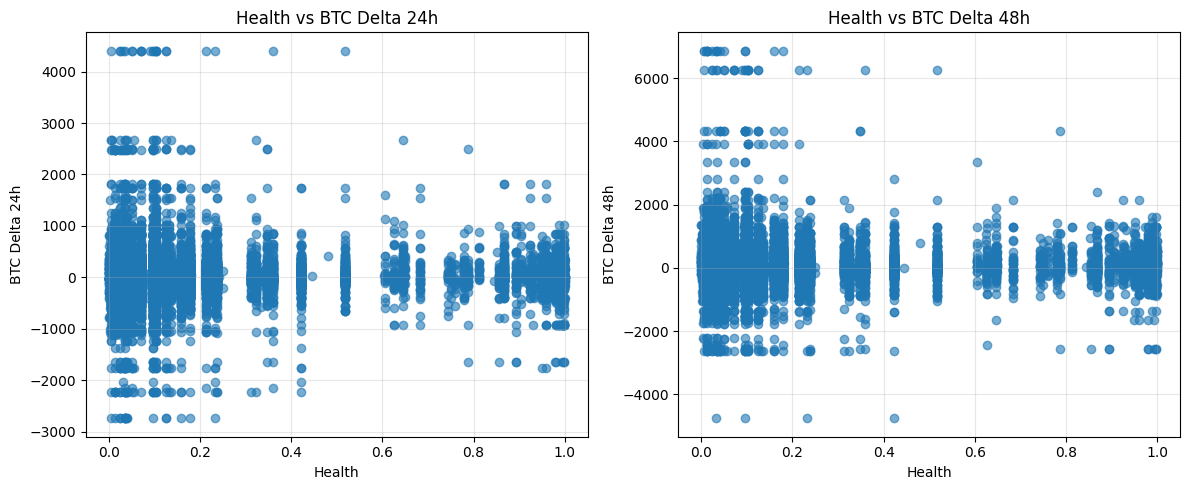

In [13]:
# Scatter plot: health vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['health'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Health')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Health vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['health'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Health')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Health vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


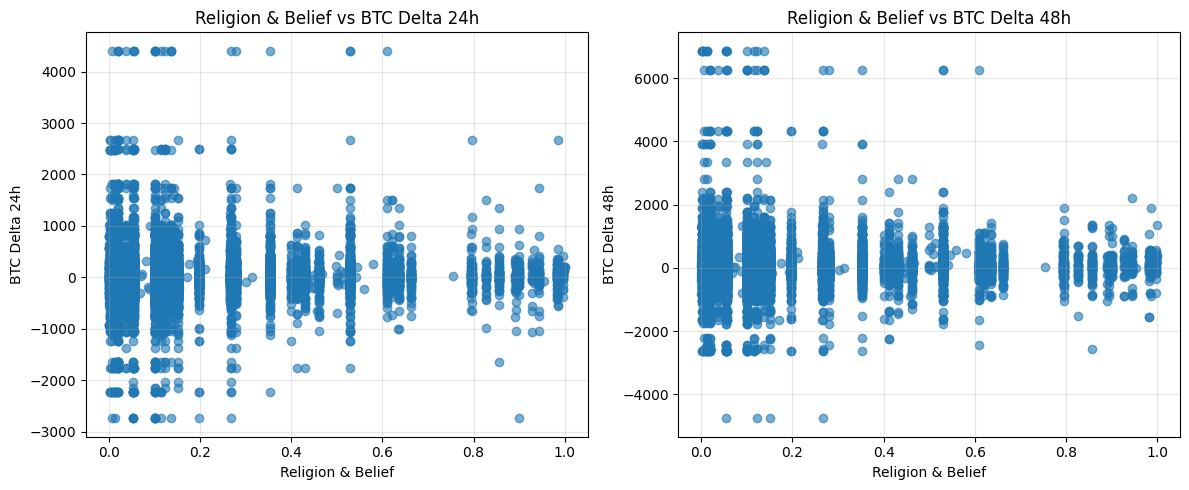

In [14]:
# Scatter plot: religion_&_belief vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['religion_&_belief'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Religion & Belief')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Religion & Belief vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['religion_&_belief'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Religion & Belief')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Religion & Belief vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


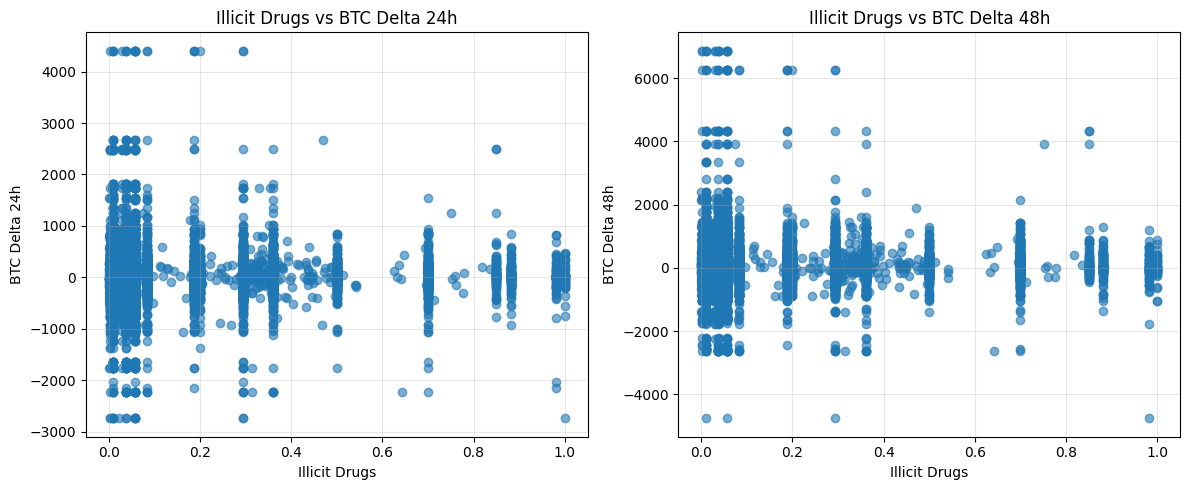

In [15]:
# Scatter plot: illicit_drugs vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['illicit_drugs'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Illicit Drugs')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Illicit Drugs vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['illicit_drugs'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Illicit Drugs')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Illicit Drugs vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


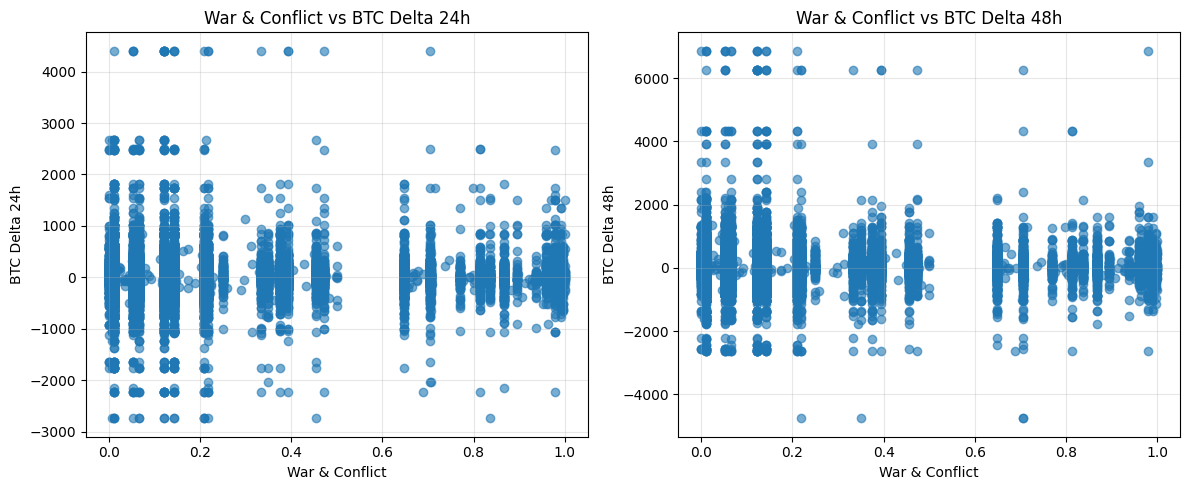

In [16]:
# Scatter plot: war_&_conflict vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['war_&_conflict'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('War & Conflict')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('War & Conflict vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['war_&_conflict'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('War & Conflict')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('War & Conflict vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


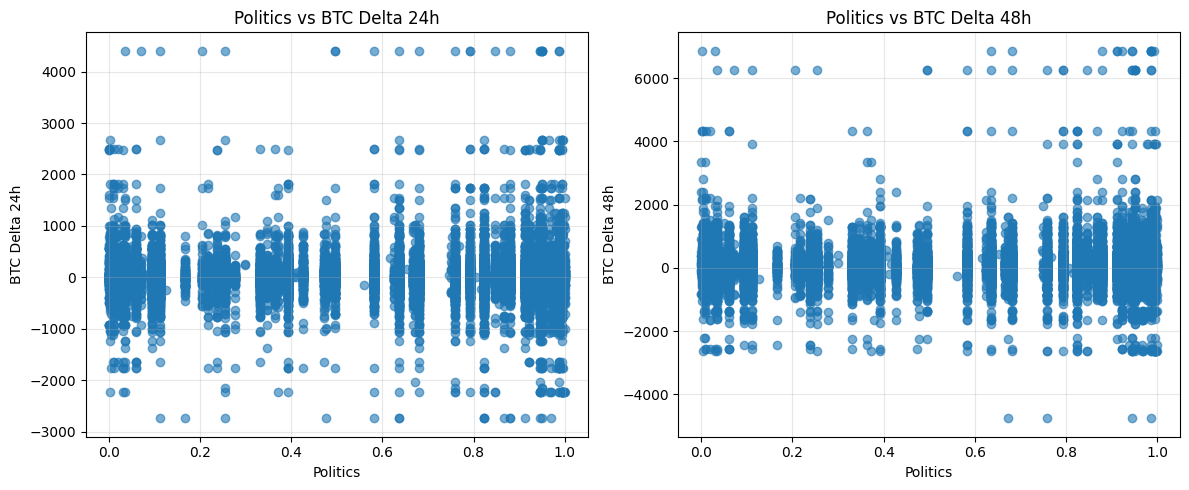

In [17]:
# Scatter plot: politics vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['politics'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Politics')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Politics vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['politics'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Politics')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Politics vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


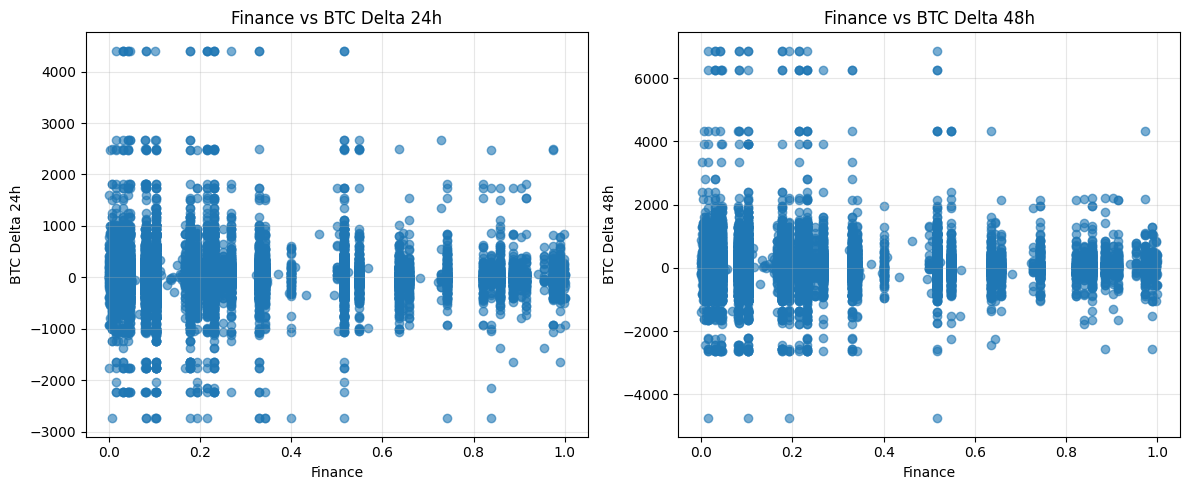

In [18]:
# Scatter plot: finance vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['finance'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Finance')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Finance vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['finance'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Finance')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Finance vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


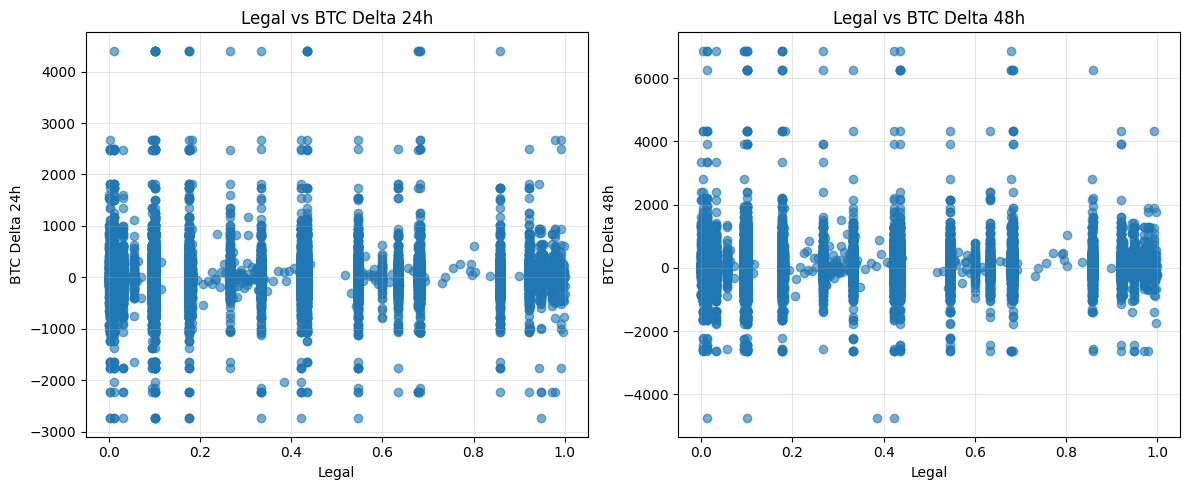

In [19]:
# Scatter plot: legal vs BTC deltas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['legal'], df['btc_delta_24h'], alpha=0.6)
ax1.set_xlabel('Legal')
ax1.set_ylabel('BTC Delta 24h')
ax1.set_title('Legal vs BTC Delta 24h')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['legal'], df['btc_delta_48h'], alpha=0.6)
ax2.set_xlabel('Legal')
ax2.set_ylabel('BTC Delta 48h')
ax2.set_title('Legal vs BTC Delta 48h')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
